# Defining Constants File 

In [49]:
DELIMITER = ','

WORD_FREQ_COUNT = 49
CHAR_FREQ_COUNT = 7
NUM_FEATURES = 57

WARNING_IGNORE = 'ignore'
TRUE_NEGATIVE = 'True Negative'
TRUE_POSITIVE = 'True Positive'
FALSE_POSITIVE = 'False Positive'
FALSE_NEGATIVE = 'False Negative'
FALSE_POSITIVE_RATE = 'False Positive Rate'
FALSE_NEGATIVE_RATE = 'False Negative Rate'
OVERALL_ERROR_RATE = 'Overall Error Rate'
MEAN_ABSOLUTE_ERROR = 'Mean Absolute Error'
MEAN_SQUARED_ERROR = 'Mean Squared Error'
PRECISION = 'Precision'
RECALL = 'Recall'
F1_SCORE = 'F1 Score'
AVG_FALSE_NEG_RATE = 'Average FNR'
AVG_FALSE_POS_RATE = 'Average FPR'
AVG_OVERALL_ERROR_RATE = 'Average OverallError Rate'
AVG_PRECISION = 'Average Precision'
AVG_RECALL = 'Average Recall'
AVG_F1_SCORE = 'Average F1 Score'
ROC_AUC_SCORE = 'roc auc score'
AVG_ROC_AUC_SCORE = 'avg roc auc score'

WORD_FREQUENCY = 'Word_Freq'
CHAR_FREQUENCY = 'Char_Freq'
CAP_RUN_LENGTH_AVG = 'Capital_Run_Length_Avg'
CAP_RUN_LENGTH_LONGEST = 'Capital_Run_Length_Longest'
CAP_RUN_LENGTH_TOTAL = 'Capital_Run_Length_Total'
CLASS_LABEL = 'Class Label'


# Read the dataset, build models

Model NaiveBayes
   True Negative  False Positive  False Negative  True Positive  \
0            229              48              52            132   
1            235              39              51            135   
2            230              34              57            139   
3            240              44              54            122   
4            238              53              40            129   
5            235              50              53            122   
6            242              49              48            121   
7            236              52              54            118   
8            221              40              57            142   
9            225              48              41            146   

   False Positive Rate  False Negative Rate  Overall Error Rate  \
0             0.173285             0.282609            0.216920   
1             0.142336             0.274194            0.195652   
2             0.128788             0.290816 

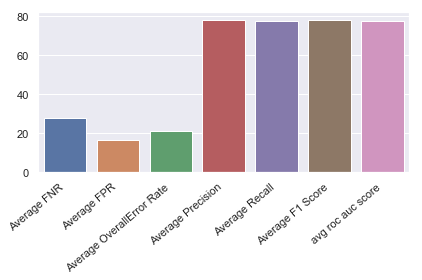

Model Decision Tree
   True Negative  False Positive  False Negative  True Positive  \
0            270              16              17            158   
1            246              20              19            175   
2            250              18              20            172   
3            273              27              13            147   
4            258              28              16            158   
5            255              16              18            171   
6            258              14              20            168   
7            267              21              17            155   
8            247              23              16            174   
9            263              18              13            166   

   False Positive Rate  False Negative Rate  Overall Error Rate  \
0             0.055944             0.097143            0.071584   
1             0.075188             0.097938            0.084783   
2             0.067164             0.1041

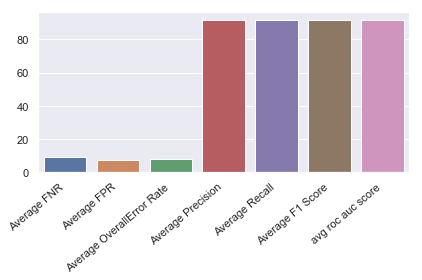

Model SVM
   True Negative  False Positive  False Negative  True Positive  \
0            238              45              30            148   
1            240              35              27            158   
2            234              49              37            140   
3            236              37              36            151   
4            231              47              35            147   
5            230              42              36            152   
6            237              44              36            143   
7            246              37              24            153   
8            260              33              34            133   
9            225              42              39            154   

   False Positive Rate  False Negative Rate  Overall Error Rate  \
0             0.159011             0.168539            0.162690   
1             0.127273             0.145946            0.134783   
2             0.173145             0.209040        

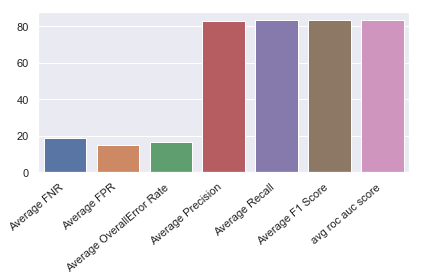

Model Logistic Regression
   True Negative  False Positive  False Negative  True Positive  \
0            261              20              18            162   
1            262              18              13            167   
2            270              17              12            161   
3            267              17              18            158   
4            277              13              21            149   
5            239              16              28            177   
6            257              25              15            163   
7            258              18              26            158   
8            263              15              19            163   
9            261              14              20            165   

   False Positive Rate  False Negative Rate  Overall Error Rate  \
0             0.071174             0.100000            0.082430   
1             0.064286             0.072222            0.067391   
2             0.059233             

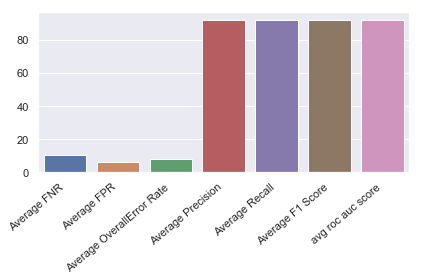

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, precision_recall_fscore_support, roc_auc_score
import numpy as np
import pandas as pd
import warnings
import SpamConstants as sc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



class ClassifySpam:
    """ Classify Email Spam or Not Spam from UCI Processed Dataset"""

    def __init__(self):
        """ Define headers for the dataset file. Initialize Pandas Dataframe to save the results."""
        self.stats_dataframe_pandas = None
        self.res_dataframe_pandas = None
        self.columns_header_list = []
        warnings.filterwarnings(sc.WARNING_IGNORE)
        self.res_dataframe = {sc.TRUE_NEGATIVE: [], sc.FALSE_POSITIVE: [],
                         sc.FALSE_NEGATIVE: [], sc.TRUE_POSITIVE: [],
                         sc.FALSE_POSITIVE_RATE: [], sc.FALSE_NEGATIVE_RATE: [], sc.OVERALL_ERROR_RATE: [],
                         sc.MEAN_ABSOLUTE_ERROR: [], sc.MEAN_SQUARED_ERROR: [],
                         sc.PRECISION: [], sc.RECALL: [], sc.F1_SCORE: [], sc.ROC_AUC_SCORE: []}

        self.stats_dataframe = {sc.AVG_FALSE_NEG_RATE: [], sc.AVG_FALSE_POS_RATE: [],
                           sc.AVG_OVERALL_ERROR_RATE: [],
                           sc.AVG_PRECISION: [], sc.AVG_RECALL: [], sc.AVG_F1_SCORE: [], sc.AVG_ROC_AUC_SCORE: []}

    def createHeaders(self):
        """ Create headers for the UCI dataset file"""
        for i in range(1, sc.WORD_FREQ_COUNT):
            self.columns_header_list.append(sc.WORD_FREQUENCY+str(i))
        for i in range(1,sc.CHAR_FREQ_COUNT):
            self.columns_header_list.append(sc.CHAR_FREQUENCY+str(i))
        self.columns_header_list.append(sc.CAP_RUN_LENGTH_AVG)
        self.columns_header_list.append(sc.CAP_RUN_LENGTH_LONGEST)
        self.columns_header_list.append(sc.CAP_RUN_LENGTH_TOTAL)
        self.columns_header_list.append(sc.CLASS_LABEL)

    def readInputData(self, filename):
        """ Read the data into Pandas Dataframe"""
        pd_dataframe = pd.read_csv(filename, delimiter=sc.DELIMITER, names = self.columns_header_list)
        return pd_dataframe

    def createNaiveBayesModel(self, pd_dataframe):
        """ Multinomial Naive Bayes model creation"""
        clf = MultinomialNB()
        train_df = pd_dataframe.iloc[:,0:sc.NUM_FEATURES]
        train_set = np.array(train_df)
        test_set = np.array(pd_dataframe[sc.CLASS_LABEL])
        return clf, train_set, test_set, pd_dataframe

    def createDTModel(self, pd_dataframe):
        """ Decision Tree classifier model creation"""
        clf = DecisionTreeClassifier()
        train_df = pd_dataframe.iloc[:, 0:sc.NUM_FEATURES]
        train_set = np.array(train_df)
        test_set = np.array(pd_dataframe[sc.CLASS_LABEL])
        return clf, train_set, test_set, pd_dataframe

    def createSVMModel(self, pd_dataframe):
        """ SVM model creation"""
        clf = SVC(gamma='auto')
        train_df = pd_dataframe.iloc[:, 0:sc.NUM_FEATURES]
        train_set = np.array(train_df)
        test_set = np.array(pd_dataframe[sc.CLASS_LABEL])
        return clf, train_set, test_set, pd_dataframe

    def createLogReg(self, pd_dataframe):
        """ Logistic Regression model creation"""
        clf = LogisticRegression(random_state=0, solver='lbfgs')
        train_df = pd_dataframe.iloc[:, 0:sc.NUM_FEATURES]
        train_set = np.array(train_df)
        test_set = np.array(pd_dataframe[sc.CLASS_LABEL])
        return clf, train_set, test_set, pd_dataframe



    def buildKFoldCV(self, clf, train_set, test_set, pd_dataframe):
        """ KFold cross validation with Confusion Matrix"""
        kf = KFold(n_splits=10, shuffle=True)
        for train_index, test_index in kf.split(pd_dataframe):
            # Split the data into train and test according to number of folds.
            X_train, X_test = train_set[train_index], train_set[test_index]
            Y_train, Y_test = test_set[train_index], test_set[test_index]

            # Fit the model
            clf.fit(X_train, Y_train)

            # Run the model
            Y_Predicted = clf.predict(X_test)

            # Calculate ROC AUC Score for the model
            roc_auc_score_result = roc_auc_score(Y_test, Y_Predicted)
            self.res_dataframe[sc.ROC_AUC_SCORE].append(roc_auc_score_result)

            # Calculate Confusion Matrix
            True_Neg, False_Pos, False_Neg, True_Pos = confusion_matrix(Y_test, Y_Predicted).ravel()
            self.res_dataframe[sc.TRUE_NEGATIVE].append(True_Neg)
            self.res_dataframe[sc.FALSE_POSITIVE].append(False_Pos)
            self.res_dataframe[sc.FALSE_NEGATIVE].append(False_Neg)
            self.res_dataframe[sc.TRUE_POSITIVE].append(True_Pos)

            # Calculate Error Rates
            mean_abs_error = mean_absolute_error(Y_test, Y_Predicted)
            self.res_dataframe[sc.MEAN_ABSOLUTE_ERROR].append(mean_abs_error)

            mean_sq_error = mean_squared_error(Y_test, Y_Predicted)
            self.res_dataframe[sc.MEAN_SQUARED_ERROR].append(mean_sq_error)

            precision, recall, f1_score, support = precision_recall_fscore_support(Y_test, Y_Predicted, average='macro')
            self.res_dataframe[sc.PRECISION].append(precision)
            self.res_dataframe[sc.RECALL].append(recall)
            self.res_dataframe[sc.F1_SCORE].append(f1_score)

            # FPR = FP/FP+TN
            if False_Pos == 0:
                false_pos_rate = 0
            else:
                false_pos_rate = False_Pos/float(False_Pos+True_Neg)
            self.res_dataframe[sc.FALSE_POSITIVE_RATE].append(false_pos_rate)

            # FNR = FN/FN+TP
            if False_Neg == 0:
                false_neg_rate = 0
            else:
                false_neg_rate = False_Neg/float(False_Neg+True_Pos)
            self.res_dataframe[sc.FALSE_NEGATIVE_RATE].append(false_neg_rate)

            # Overall Misclassification Error= (FP+FN) / (TP+TN+FP+FN)
            overall_error_rate = (False_Pos+False_Neg)/(True_Neg + False_Pos + False_Neg + True_Pos)
            self.res_dataframe[sc.OVERALL_ERROR_RATE].append(overall_error_rate)
        self.res_dataframe_pandas = pd.DataFrame(data=self.res_dataframe)

    def evaluateModel(self):
        """ Average of all error rates"""
        avg_fnr = sum(self.res_dataframe[sc.FALSE_NEGATIVE_RATE])/float(len(self.res_dataframe[sc.FALSE_NEGATIVE_RATE]))
        self.stats_dataframe[sc.AVG_FALSE_NEG_RATE]=avg_fnr
        avg_fpr = sum(self.res_dataframe[sc.FALSE_POSITIVE_RATE])/len(self.res_dataframe[sc.FALSE_POSITIVE_RATE])
        self.stats_dataframe[sc.AVG_FALSE_POS_RATE]=avg_fpr
        avg_overall_rate = sum(self.res_dataframe[sc.OVERALL_ERROR_RATE])/len(self.res_dataframe[sc.OVERALL_ERROR_RATE])
        self.stats_dataframe[sc.AVG_OVERALL_ERROR_RATE]=avg_overall_rate
        avg_precision = sum(self.res_dataframe[sc.PRECISION])/len(self.res_dataframe[sc.PRECISION])
        self.stats_dataframe[sc.AVG_PRECISION]=avg_precision
        avg_recall = sum(self.res_dataframe[sc.RECALL])/len(self.res_dataframe[sc.RECALL])
        self.stats_dataframe[sc.AVG_RECALL]=avg_recall
        avg_f1_score = sum(self.res_dataframe[sc.F1_SCORE])/len(self.res_dataframe[sc.F1_SCORE])
        self.stats_dataframe[sc.AVG_F1_SCORE]=avg_f1_score
        avg_score_roc_auc = sum(self.res_dataframe[sc.ROC_AUC_SCORE])/len(self.res_dataframe[sc.ROC_AUC_SCORE])
        self.stats_dataframe[sc.AVG_ROC_AUC_SCORE]=avg_score_roc_auc
        self.stats_dataframe_pandas = pd.DataFrame(data=self.stats_dataframe, index=[0])



if __name__ == '__main__':
    classifySpamObj = ClassifySpam()
    classifySpamObj.createHeaders()
    dataset_filename = 'spambase/spambase.data'
    models = {'NaiveBayes':classifySpamObj.createNaiveBayesModel,
              'Decision Tree':classifySpamObj.createDTModel,
              'SVM':classifySpamObj.createSVMModel,
              'Logistic Regression':classifySpamObj.createLogReg}

    for each_model in models.keys():
        classifySpamObj = ClassifySpam()
        classifySpamObj.createHeaders()
        pd_dataframe = classifySpamObj.readInputData(dataset_filename)
        statistics ={'Statistics':[], 'Values':[]}
        print('Model '+each_model)
        model, train_set, test_set, dataframe = models[each_model](pd_dataframe)
        classifySpamObj.buildKFoldCV(model, train_set, test_set, dataframe)
        classifySpamObj.evaluateModel()
        print(classifySpamObj.res_dataframe_pandas)
        print(classifySpamObj.stats_dataframe_pandas)
        statistics['Statistics'] = list(classifySpamObj.stats_dataframe_pandas.columns.values)
        mod_df = classifySpamObj.stats_dataframe_pandas.loc[0]
        for i in range(0, len(list(classifySpamObj.stats_dataframe_pandas.columns.values))):
            statistics['Values'].append(mod_df[i]*100)
        ax = sns.barplot(x='Statistics',y='Values', data=statistics)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.tight_layout()
        plt.show()

# The barplots above show the average calculated over 10 kfolds. The tables show the statistics for each kfold.